In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import tensorflow_hub as hub
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from helper_functions import create_tensorboard_callback, plot_loss_curves, walk_through_dir, unzip_data

### Retrieve data

In [3]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [12]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [13]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SHAPE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE)


test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMAGE_SHAPE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE)                                                                

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Model 0: Building a transfer learning model using the Keras Functional API 

In [19]:

base_model = tf.keras.applications.EfficientNetV2B0( include_top=False) #Custom Dense layer on the top)

# Freeze the base model
base_model.trainable = False

# Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), # EfficientNet have rescaling build in
                               name="input_layer") 

# Pass the input to the base model
x = base_model(inputs)

# Average pool the output of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Create the outputs activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0  = tf.keras.Model(inputs, outputs)


In [20]:
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
history = model_0.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data)
            validation_data=test_data)

Epoch 1/5
24/24 [==============================] - 3s 101ms/step - loss: 0.5196 - accuracy: 0.8787 - val_loss: 0.5243 - val_accuracy: 0.8676
Epoch 2/5
24/24 [==============================] - 2s 96ms/step - loss: 0.4696 - accuracy: 0.8933 - val_loss: 0.4953 - val_accuracy: 0.8680
Epoch 3/5
24/24 [==============================] - 2s 96ms/step - loss: 0.4345 - accuracy: 0.9013 - val_loss: 0.4732 - val_accuracy: 0.8740
Epoch 4/5
24/24 [==============================] - 2s 96ms/step - loss: 0.4064 - accuracy: 0.9053 - val_loss: 0.4570 - val_accuracy: 0.8772
Epoch 5/5
24/24 [==============================] - 2s 96ms/step - loss: 0.3671 - accuracy: 0.9173 - val_loss: 0.4431 - val_accuracy: 0.8756


In [24]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_5
1 rescaling_4
2 normalization_4
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 b

In [26]:
# How about gettinf a summury
model_0.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________


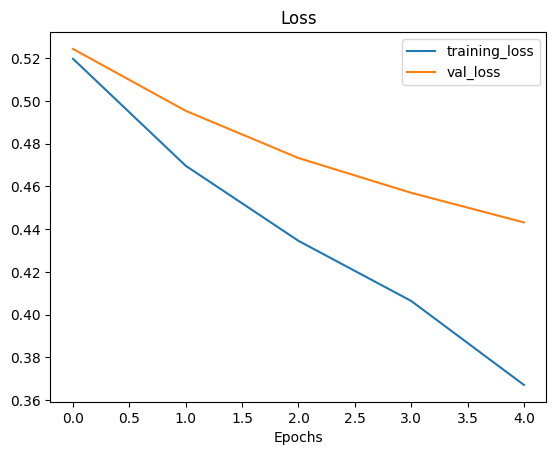

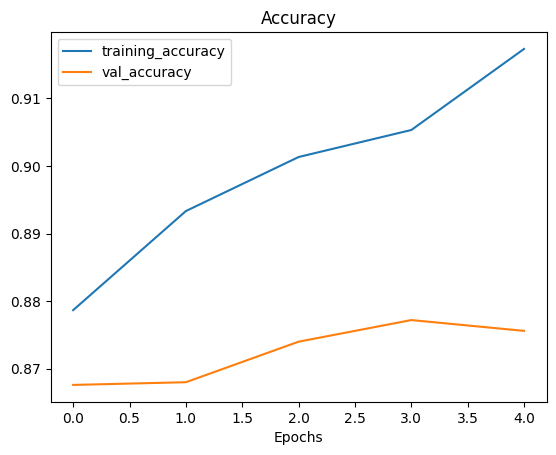

In [27]:
plot_loss_curves(history=history)